In [1]:
import sys
sys.path.append('../code')
from init_mooc_nb import *
init_notebook()

from IPython.display import HTML
from nbconvert.filters.markdown import markdown2html_pandoc

displaymd = lambda markdown: display_html(HTML(markdown2html_pandoc(markdown)))

# Markdown tables are ugly, and Mathjax doesn't support \tabular,
# therefore we use math mode + \array + add a command \T to make 
# the \array rows less dense.

table_header = r"""$$
\require{color}
colordefs
\newcommand\T{\Rule{0pt}{1em}{.3em}}
\begin{array}{fmt}
\hline
body\\
\hline
\end{array}
$$"""

replacements = [('{', '{{'), ('}', '}}'), ('colordefs', '{colordefs}'),
                ('fmt', '{fmt}'), ('body', '{body}')]
for i, j in replacements:
    table_header = table_header.replace(i, j)

# Symmetry classes names and their symmetry properties
symmetry_classes = ("A", "AIII", "AI", "BDI", "D", "DIII", "AII", "CII", "C", "CI")
chiralsym = 5 * ('', '1')
phs = 3 * ('',) + 3 * ('1',) + ('',) + 3 * ('-1',)
trs = 2 * ('',) + 2 * ('1',) + ('',) + 3 * ('-1',) + ('', '1')

# Locations of non-empty entries in the periodic table
primary_seq = lambda n: np.arange(n) % 2
z_descendant = lambda n: np.arange(n) % 8
z2_descendant = lambda n: np.arange(1, n+1) % 8
z2_descendant2 = lambda n: np.arange(2, n+2) % 8
twoz_descendant = lambda n: np.arange(4, n+4) % 8

line_end = '\\T\\\\\n'
sep = ' & '

def make_table(n=4, show_symmetries=True, sort_order=None):
    """Create an array of entries forming the periodic table.
    
    Parameters:
    -----------
    n : int
        Number of dimensions to show.
    show_symmetries : bool
        Show symmetry information for each symmetry class.
    sort_order : int array or None
        Ordering to apply to the symmetry classes 
        (can be trivially used to discard entries).
    
    Returns:
    --------
    data : np.ndarray
        A string array with the entries of the periodic table.
    format_string : str
        An alignment string that can be used to feed the resulting
        table to a Latex \array environment. 
    """

    dimensions = np.array([[str(i) for i in range(n)]], dtype='S100')
    if dimensions.shape[1]:
        dimensions[0, 0] = r'd=' + dimensions[0, 0].decode('UTF-8')

    complex_entries = np.zeros((2, n), dtype='S100')
    complex_entries[primary_seq(n), np.arange(n)] = r'\mathbb{Z}'

    real_entries = np.zeros((8, n), dtype='S100')
    real_entries[z_descendant(n), np.arange(n)] = r'\mathbb{Z}'
    real_entries[z2_descendant(n), np.arange(n)] = r'\mathbb{Z}_2'
    real_entries[z2_descendant2(n), np.arange(n)] = r'\mathbb{Z}_2'
    real_entries[twoz_descendant(n), np.arange(n)] = r'2\mathbb{Z}'


    entries = np.r_[complex_entries, real_entries]

    sym_classes_rm = tuple(r'\textrm{{{}}}'.format(cl) for cl in symmetry_classes)

    sym = np.array([sym_classes_rm] + show_symmetries * [chiralsym, phs, trs], dtype='S100').T
    sym_header = np.array([[r'\textrm{class}'] + 
                           show_symmetries * [r'\mathcal{C}', r'\mathcal{P}', r'\mathcal{T}']], dtype='S100')
    header = np.c_[sym_header, dimensions]
    
    table = np.c_[sym, entries]
    if sort_order is not None:
        table = table[sort_order]

    format_string = 'c|' + show_symmetries * 'rrr' + n * show_symmetries * '|' + n * 'c'
    return np.r_[header, table], format_string


def color_table(table, color_array):
    """Apply rgb colors to table entries.
    
    `color_array[i, j]` is the rgb color of the entry `(i, j)`.
    
    Returns the string of color definitions required for coloring the table.
    """
    apply_color = lambda text, color: r'\color{{{}}}{{{}}}'.format(color, text)

    colors = {}
    for idx in np.indices(table.shape).reshape(2, -1).T:
        idx = tuple(idx)
        if not any(color_array[idx]):
            pass
        color = ','.join('{:1.2}'.format(i) for i in color_array[idx])
        val = str(abs(hash(color)))[:8]
        colors[color] = val
        table[idx] = apply_color(table[idx].decode('utf-8'), val)

    defs = []
    for color, code in list(colors.items()):
        defs.append(r'\definecolor{{{}}}{{rgb}}{{{}}}'.format(code, color))
    return '\n'.join(defs)

Populated the namespace with:
np, matplotlib, kwant, holoviews, init_notebook, interact, display_html, plt, pf, SimpleNamespace, pprint_matrix, scientific_number, pretty_fmt_complex
from code/edx_components:
MoocVideo, PreprintReference, MoocDiscussion, MoocCheckboxesAssessment, MoocMultipleChoiceAssessment, MoocPeerAssessment, MoocSelfAssessment
from code/functions:
spectrum, hamiltonian_array, h_k, pauli


Press this button to show/hide the code used in the notebook:

**No content above this line is visible in edX**

# Introduction

Shinsei Ryu from the University of Illinois will introduce the general classification of topological insulators and superconductors.

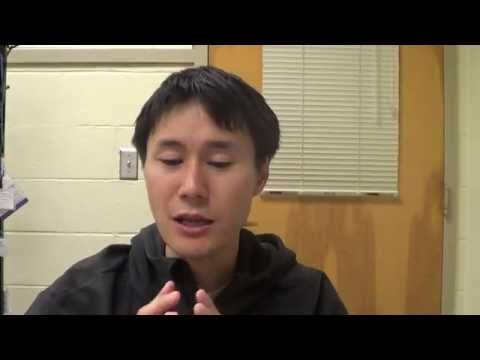

In [2]:
MoocVideo("cKzUuQyZjFo", src_location="8.1-intro")

# At a glance: periodic table

In [3]:
full_table, format_string = make_table(show_symmetries=False, sort_order=np.argsort(symmetry_classes))

rows = [sep.join([c.decode('utf-8') for c in line]) for line in full_table]

rows[1] = r'\hline ' + rows[1]
block = line_end.join(rows)
colordefs='{}'

displaymd(table_header.format(colordefs=colordefs, fmt=format_string, body=block))

\[
\require{color}
{}
\newcommand\T{\Rule{0pt}{1em}{.3em}}
\begin{array}{c|cccc}
\hline
\textrm{class} & d=0 & 1 & 2 & 3\T\\
\hline \textrm{A} & \mathbb{Z} & & \mathbb{Z} & \T\\
\textrm{AI} & \mathbb{Z} & & & \T\\
\textrm{AII} & 2\mathbb{Z} & & \mathbb{Z}_2 & \mathbb{Z}_2\T\\
\textrm{AIII} & & \mathbb{Z} & & \mathbb{Z}\T\\
\textrm{BDI} & \mathbb{Z}_2 & \mathbb{Z} & & \T\\
\textrm{C} & & & 2\mathbb{Z} & \T\\
\textrm{CI} & & & & 2\mathbb{Z}\T\\
\textrm{CII} & & 2\mathbb{Z} & & \mathbb{Z}_2\T\\
\textrm{D} & \mathbb{Z}_2 & \mathbb{Z}_2 & \mathbb{Z} & \T\\
\textrm{DIII} & & \mathbb{Z}_2 & \mathbb{Z}_2 & \mathbb{Z}\\
\hline
\end{array}
\]

Let us now look at all the possible symmetry classes in dimensions from $0$ to $3$, and see what kind of topological insulators are possible.

There are quite a few, here is the full list:

This table has a lot of logic in it, but to you it most likely looks no better than this:

In [4]:
np.random.seed(1)

full_table, format_string = make_table(show_symmetries=False, sort_order=np.random.permutation(10))

color_array = np.round(np.random.rand(*(full_table.shape + (3,))), 2)
colordefs = color_table(full_table, color_array)

rows = [sep.join([c.decode('utf-8') for c in line]) for line in full_table]
rows[1] = r'\hline ' + rows[1]
block = line_end.join(rows)

displaymd(table_header.format(colordefs=colordefs, fmt=format_string, body=block))

\[
\require{color}
\definecolor{68628178}{rgb}{0.58,0.57,0.61}
\definecolor{14870830}{rgb}{0.62,0.66,0.3}
\definecolor{17260099}{rgb}{0.54,0.77,0.05}
\definecolor{28907875}{rgb}{0.44,0.23,0.53}
\definecolor{51581641}{rgb}{0.8,0.09,0.52}
\definecolor{91247218}{rgb}{0.72,0.61,0.43}
\definecolor{91639059}{rgb}{0.55,0.07,0.47}
\definecolor{68278318}{rgb}{0.94,0.38,0.76}
\definecolor{23755525}{rgb}{0.74,0.19,0.46}
\definecolor{15043469}{rgb}{0.96,0.26,0.23}
\definecolor{12944398}{rgb}{0.59,0.67,0.41}
\definecolor{72617455}{rgb}{0.64,0.13,0.69}
\definecolor{65106034}{rgb}{0.92,0.91,0.3}
\definecolor{25961422}{rgb}{0.78,0.41,0.03}
\definecolor{27663031}{rgb}{0.27,0.06,0.67}
\definecolor{62409897}{rgb}{0.47,0.1,0.9}
\definecolor{19701551}{rgb}{0.01,0.5,0.07}
\definecolor{74222721}{rgb}{0.07,0.15,0.16}
\definecolor{37295619}{rgb}{0.45,0.22,0.07}
\definecolor{58394126}{rgb}{0.71,0.47,0.76}
\definecolor{81234667}{rgb}{0.15,0.58,0.01}
\definecolor{26516304}{rgb}{0.91,0.46,0.43}
\definecolor{53089523}{rgb}{0.87,0.83,0.83}
\definecolor{48388257}{rgb}{0.94,0.78,0.72}
\definecolor{10616321}{rgb}{0.88,0.54,0.45}
\definecolor{76940485}{rgb}{0.94,0.37,0.05}
\definecolor{63200946}{rgb}{0.85,0.31,0.52}
\definecolor{58107031}{rgb}{0.04,0.65,0.13}
\definecolor{80842894}{rgb}{0.77,0.3,0.77}
\definecolor{64367404}{rgb}{0.98,0.89,0.76}
\definecolor{73127364}{rgb}{0.23,0.51,0.21}
\definecolor{41605115}{rgb}{0.39,0.67,0.94}
\definecolor{83498244}{rgb}{0.4,0.11,0.51}
\definecolor{59148993}{rgb}{0.36,0.75,0.88}
\definecolor{68898617}{rgb}{0.76,0.46,0.53}
\definecolor{12501716}{rgb}{0.05,0.52,0.17}
\definecolor{25636562}{rgb}{0.36,0.15,0.94}
\definecolor{15250092}{rgb}{0.97,0.28,0.23}
\definecolor{29163778}{rgb}{0.12,0.52,0.08}
\definecolor{84196975}{rgb}{0.14,0.79,0.03}
\definecolor{69329972}{rgb}{0.47,0.27,0.83}
\definecolor{58126236}{rgb}{0.09,0.57,0.42}
\definecolor{47917632}{rgb}{0.65,0.35,0.76}
\definecolor{61117841}{rgb}{0.89,0.38,0.54}
\definecolor{88616857}{rgb}{0.92,0.78,0.62}
\definecolor{63977948}{rgb}{0.74,0.3,0.2}
\definecolor{65514722}{rgb}{0.65,0.04,0.81}
\definecolor{82966405}{rgb}{0.29,0.36,0.27}
\definecolor{90184258}{rgb}{0.65,0.36,0.57}
\definecolor{36490803}{rgb}{0.79,0.06,0.36}
\definecolor{13095201}{rgb}{0.53,0.95,0.49}
\definecolor{42662709}{rgb}{0.37,0.81,0.29}
\definecolor{89168315}{rgb}{0.1,0.29,0.23}
\definecolor{46977105}{rgb}{0.2,0.29,0.14}
\definecolor{80246134}{rgb}{0.75,0.43,0.43}
\newcommand\T{\Rule{0pt}{1em}{.3em}}
\begin{array}{c|cccc}
\hline
\color{41605115}{\textrm{class}} & \color{63200946}{d=0} & \color{28907875}{1} & \color{26516304}{2} & \color{48388257}{3}\T\\
\hline \color{51581641}{\textrm{AI}} & \color{53089523}{\mathbb{Z}} & \color{27663031}{} & \color{12944398}{} & \color{46977105}{}\T\\
\color{25961422}{\textrm{CI}} & \color{14870830}{} & \color{37295619}{} & \color{62409897}{} & \color{29163778}{2\mathbb{Z}}\T\\
\color{65106034}{\textrm{AII}} & \color{68628178}{2\mathbb{Z}} & \color{15043469}{} & \color{13095201}{\mathbb{Z}_2} & \color{17260099}{\mathbb{Z}_2}\T\\
\color{84196975}{\textrm{D}} & \color{10616321}{\mathbb{Z}_2} & \color{61117841}{\mathbb{Z}_2} & \color{90184258}{\mathbb{Z}} & \color{72617455}{}\T\\
\color{47917632}{\textrm{A}} & \color{59148993}{\mathbb{Z}} & \color{19701551}{} & \color{36490803}{\mathbb{Z}} & \color{68278318}{}\T\\
\color{80842894}{\textrm{BDI}} & \color{81234667}{\mathbb{Z}_2} & \color{58394126}{\mathbb{Z}} & \color{69329972}{} & \color{91639059}{}\T\\
\color{23755525}{\textrm{AIII}} & \color{73127364}{} & \color{12501716}{\mathbb{Z}} & \color{83498244}{} & \color{89168315}{\mathbb{Z}}\T\\
\color{15250092}{\textrm{CII}} & \color{58126236}{} & \color{42662709}{2\mathbb{Z}} & \color{91247218}{} & \color{80246134}{\mathbb{Z}_2}\T\\
\color{25636562}{\textrm{C}} & \color{88616857}{} & \color{58107031}{} & \color{82966405}{2\mathbb{Z}} & \color{74222721}{}\T\\
\color{76940485}{\textrm{DIII}} & \color{63977948}{} & \color{64367404}{\mathbb{Z}_2} & \color{65514722}{\mathbb{Z}_2} & \c

But don't worry, we are going to learn exactly what these tables mean.

First of all, let's review the meaning of the entries in the table. Each entry gives the topological classification of a system with a given combination of symmetries and dimensionality. In other words, it gives us the possible values that the topological invariant $Q$ of such a system can take.

An empty entry means that the system does not have a topological phase. In other words, all gapped Hamiltonians with dimension and symmetries corresponding to an empty entry can be deformed into each other, without ever closing the bulk gap and without breaking any existing symmetry.

A $\mathbb{Z}$ entry tells us that the topological invariant is an integer number, $Q=0, \pm 1, \pm 2, \dots$ An example of such a system is the quantum Hall effect, for which the topological invariant is the Chern number. The value of $Q$ specifies the number of chiral edge states and their chirality, which is opposite for opposite signs of $Q$.

A $2\mathbb{Z}$ entry is much like a $\mathbb{Z}$ entry, except that the invariant may only take even numbers, $Q=0,\pm2, \pm4, \dots$, because of some doubling of the degrees of freedom. An example is a quantum dot with spinful time-reversal symmetry, for which the topological invariant is the number of filled energy levels. It may only be an even number because of Kramers degeneracy.

A $\mathbb{Z}_2$ entry means that there are only two distinct topological phases, with $Q=\pm 1$ (or $Q=0, 1$, depending on convention). An example we know is the Majorana chain, with the Pfaffian topological invariant, which distinguishes between the two phases with or without unpaired Majorana modes and the ends. Another example we know are the time-reversal invariant topological insulators in two and three dimensions.

Now that we have attached a meaning to each entry in the table, let's try to understand the table as a whole. The first thing to do is to understand why it has ten and only ten rows.

# Symmetry classes

Each row in the table corresponds to a certain *symmetry class*, that is to a given combination of the presence or absence of three fundamental discrete symmetries.

You already encountered these three symmetries all the way back in week one. They are time-reversal symmetry ($\mathcal{T}$), particle-hole symmetry ($\mathcal{P}$) and chiral symmetry ($\mathcal{C}$). We previously referred to chiral symmetry $\mathcal{C}$ as sublattice symmetry. This is because in condensed matter physics, a natural realization of chiral symmetry is a system composed of two sublattices, such that sites in one lattice only couple to sites in the other.

Why do we consider these symmetries fundamental, and restrict the periodic table to them only?

As you may recall from week one, and as Shinsei Ryu explained in the introductory video, normal unitary symmetries of a Hamiltonian do not have particularly interesting consequences for topological classification. One may always make the Hamiltonian block-diagonal, reducing the problem to the study of a single block. This procedure can be repeated until one runs out of unitary symmetries and is left with an *irreducible* block of the Hamiltonian, i.e. one which cannot be block diagonalized.

Time-reversal, particle-hole and chiral symmetries act in a different way. They impose certain constraints on an irreducible Hamiltonian - for instance, by forcing it to be a real matrix, or to be block off-diagonal.

Note, however, that it is possible to extend the periodic table to study the interplay between these three discrete symmetries and other unitary symmetries. For instance, we have already touched upon crystalline symmetries in week seven, and we will return to them in week ten.

But for now, let's focus on the three fundamental discrete symmetries: $\mathcal{P}$, $\mathcal{T}$ and $\mathcal{C}$. Their basic properties are:

* $\mathcal{T}$ is an anti-unitary operator which commutes with the Hamiltonian.
* $\mathcal{P}$ is an anti-unitary operator which anti-commutes with the Hamiltonian.
* $\mathcal{C}$ is a unitary operator which anti-commutes with the Hamiltonian.

Recall that an anti-unitary operator can be written as the product of a unitary operator and the complex conjugation operator $\mathcal{K}$. The next important thing to know is that time-reversal and particle-hole symmetry may come in two separate flavors, depending on whether they square to plus or minus one.

For instance, you will recall that for the time-reversal operator acting on electronic states, $\mathcal{T}^2=-1$. This was the crux of Kramers theorem, which in turn was the key to topological insulators. If you go back to week one, you will also remember that we discussed real matrices, which were symmetric under a time-reversal operator $\mathcal{T}=\mathcal{K}$. This operator satisfies $\mathcal{T}^2=1$.

Thus, a system can behave in three ways under time-reversal symmetry $\mathcal{T}$: (1) it does not have time-reversal symmetry, (2) it has it and $\mathcal{T}$ squares to $+1$, (3) it has it and $\mathcal{T}$ squares to $-1$. The same holds for particle-hole symmetry, which can also have $\mathcal{P}^2=\pm 1$. On the other hand, the chiral symmetry only comes in one flavor, $\mathcal{C}^2=1$.

## Combining symmetries

How do we arrive to having ten symmetry classes? Let's count all the possible cases carefully. By combining the three cases for $\mathcal{P}$ and the three cases for $\mathcal{T}$ we arrive at nine possible combinations. 

The important thing to notice now is that $\mathcal{C}$ is not completely independent from $\mathcal{T}$ and $\mathcal{P}$. Whenever a system has both $\mathcal{T}$ and $\mathcal{P}$, there is also a chiral symmetry $\mathcal{C}=\mathcal{P\cdot T}$.

This also means that if a system only has either $\mathcal{T}$ or $\mathcal{P}$ but not both, it cannot have a chiral symmetry $\mathcal{C}$. In other words, the presence of any two out of the three symmetries implies that the third is also present.

On the other hand, if both $\mathcal{P}$ and $\mathcal{T}$ are absent, then $\mathcal{C}$ may or may not be present. This gives us two distinct cases.

Adding all the possibilities, we indeed find 10 symmetry classes:

$$(3\times 3 - 1) + 2 = 8 + 2 = 10\,.$$

The first term in the sum corresponds to the eight cases where there is at least one anti-unitary symmetry: either $\mathcal{P}$, or $\mathcal{T}$, or both. These eight symmetry classes are called *real*, because an anti-unitary symmetry always involves the complex conjugation operator. This does not necessarily mean that the Hamiltonian is a real matrix, but it is a reminder that there is a constraint between its real and imaginary parts.

The second term in the sum covers the two cases when there are no anti-unitary symmetries. These symmetry classes are called *complex*.

Let's have another look at the 10 rows in the table, this time specifying which combination of the three fundamental symmetries each row has:

In [5]:
np.random.seed(1)

full_table, format_string = make_table(n=0, show_symmetries=True, sort_order=np.argsort(symmetry_classes))

rows = [sep.join([c.decode('utf-8') for c in line]) for line in full_table]
rows[1] = r'\hline ' + rows[1]

block = line_end.join(rows)

displaymd(table_header.format(colordefs=colordefs, fmt=format_string, body=block))

\[
\require{color}
\definecolor{68628178}{rgb}{0.58,0.57,0.61}
\definecolor{14870830}{rgb}{0.62,0.66,0.3}
\definecolor{17260099}{rgb}{0.54,0.77,0.05}
\definecolor{28907875}{rgb}{0.44,0.23,0.53}
\definecolor{51581641}{rgb}{0.8,0.09,0.52}
\definecolor{91247218}{rgb}{0.72,0.61,0.43}
\definecolor{91639059}{rgb}{0.55,0.07,0.47}
\definecolor{68278318}{rgb}{0.94,0.38,0.76}
\definecolor{23755525}{rgb}{0.74,0.19,0.46}
\definecolor{15043469}{rgb}{0.96,0.26,0.23}
\definecolor{12944398}{rgb}{0.59,0.67,0.41}
\definecolor{72617455}{rgb}{0.64,0.13,0.69}
\definecolor{65106034}{rgb}{0.92,0.91,0.3}
\definecolor{25961422}{rgb}{0.78,0.41,0.03}
\definecolor{27663031}{rgb}{0.27,0.06,0.67}
\definecolor{62409897}{rgb}{0.47,0.1,0.9}
\definecolor{19701551}{rgb}{0.01,0.5,0.07}
\definecolor{74222721}{rgb}{0.07,0.15,0.16}
\definecolor{37295619}{rgb}{0.45,0.22,0.07}
\definecolor{58394126}{rgb}{0.71,0.47,0.76}
\definecolor{81234667}{rgb}{0.15,0.58,0.01}
\definecolor{26516304}{rgb}{0.91,0.46,0.43}
\definecolor{53089523}{rgb}{0.87,0.83,0.83}
\definecolor{48388257}{rgb}{0.94,0.78,0.72}
\definecolor{10616321}{rgb}{0.88,0.54,0.45}
\definecolor{76940485}{rgb}{0.94,0.37,0.05}
\definecolor{63200946}{rgb}{0.85,0.31,0.52}
\definecolor{58107031}{rgb}{0.04,0.65,0.13}
\definecolor{80842894}{rgb}{0.77,0.3,0.77}
\definecolor{64367404}{rgb}{0.98,0.89,0.76}
\definecolor{73127364}{rgb}{0.23,0.51,0.21}
\definecolor{41605115}{rgb}{0.39,0.67,0.94}
\definecolor{83498244}{rgb}{0.4,0.11,0.51}
\definecolor{59148993}{rgb}{0.36,0.75,0.88}
\definecolor{68898617}{rgb}{0.76,0.46,0.53}
\definecolor{12501716}{rgb}{0.05,0.52,0.17}
\definecolor{25636562}{rgb}{0.36,0.15,0.94}
\definecolor{15250092}{rgb}{0.97,0.28,0.23}
\definecolor{29163778}{rgb}{0.12,0.52,0.08}
\definecolor{84196975}{rgb}{0.14,0.79,0.03}
\definecolor{69329972}{rgb}{0.47,0.27,0.83}
\definecolor{58126236}{rgb}{0.09,0.57,0.42}
\definecolor{47917632}{rgb}{0.65,0.35,0.76}
\definecolor{61117841}{rgb}{0.89,0.38,0.54}
\definecolor{88616857}{rgb}{0.92,0.78,0.62}
\definecolor{63977948}{rgb}{0.74,0.3,0.2}
\definecolor{65514722}{rgb}{0.65,0.04,0.81}
\definecolor{82966405}{rgb}{0.29,0.36,0.27}
\definecolor{90184258}{rgb}{0.65,0.36,0.57}
\definecolor{36490803}{rgb}{0.79,0.06,0.36}
\definecolor{13095201}{rgb}{0.53,0.95,0.49}
\definecolor{42662709}{rgb}{0.37,0.81,0.29}
\definecolor{89168315}{rgb}{0.1,0.29,0.23}
\definecolor{46977105}{rgb}{0.2,0.29,0.14}
\definecolor{80246134}{rgb}{0.75,0.43,0.43}
\newcommand\T{\Rule{0pt}{1em}{.3em}}
\begin{array}{c|rrr}
\hline
\textrm{class} & \mathcal{C} & \mathcal{P} & \mathcal{T}\T\\
\hline \textrm{A} & & & \T\\
\textrm{AI} & & & 1\T\\
\textrm{AII} & & & -1\T\\
\textrm{AIII} & 1 & & \T\\
\textrm{BDI} & 1 & 1 & 1\T\\
\textrm{C} & & -1 & \T\\
\textrm{CI} & 1 & -1 & 1\T\\
\textrm{CII} & 1 & -1 & -1\T\\
\textrm{D} & & 1 & \T\\
\textrm{DIII} & 1 & 1 & -1\\
\hline
\end{array}
\]

The somewhat cryptic notations in the leftmost column are just the names of the different symmetry classes. (Also the 'I's appearing there are Roman cardinal numbers, so for instance BDI is 'B D one', and AIII is "A three".)

Their names come from an elegant mathematical classification of [symmetric spaces](http://en.wikipedia.org/wiki/Symmetric_space) worked out by [Elie Cartan](http://en.wikipedia.org/wiki/%C3%89lie_Cartan) in 1926. While it is definitely intriguing that a group theory result from 1926 reappears in a totally different context almost 80 years later, the origin of this nomenclature is not directly relevant to most of the theory done in the field. 
The two complex classes are A and AIII.

In [6]:
question = "Which symmetry class do we get if we break Kramers degeneracy in class BDI?"

answers = ["D", "AIII", "DIII", "None, class BDI has no Kramers degeneracy"]

explanation = "Kramers degeneracy requires that time reversal squares to -1, while it squares to 1 in class BDI."

MoocMultipleChoiceAssessment(question=question, answers=answers, correct_answer=3, explanation=explanation)

MoocMultipleChoiceAssessment(**{'correct_answer': 3, 'question': 'Which symmetry class do we get if we break Kramers degeneracy in class BDI?', 'max_attempts': 2, 'display_name': 'Question', 'explanation': 'Kramers degeneracy requires that time reversal squares to -1, while it squares to 1 in class BDI.', 'answers': ['D', 'AIII', 'DIII', 'None, class BDI has no Kramers degeneracy']})

Finally, let us make an extra observation:

> While the particle-hole symmetry appears in any superconductor, it must satisfy $\mathcal{P}^2 = -\mathcal{T}^2$ due to the way the Bogoliubov quasiparticles are related to the original electrons. This makes the symmetry classes BDI, and CII rely on a fine-tuned Hamiltonian, just like the symmetry class AIII.

# What we learned so far

To get some confidence with the table and these obscure names, it is useful to see where the topological systems that we have studied so far fit into the table.

Every red entry in the table below corresponds to something which we already know and studied in the previous weeks of the course, as you can discover by moving the mouse over it.

In [7]:

tooltips = {(1, 6): "Chern insulator: no symmetries, d=2",
            (9, 5): "Majorana wire: spinful particle-hole, d=1",
            (4, 5): "Polyacetilene/SSH chain: sublattice symmetry, d=1",
            (3, 6): "QSHE: spinful TRS, d=2",
            (3, 7): "3D strong TI: spinful TRS, d=3",
            (9, 6): "p-wave superconductor: PHS, d=2",
            (9, 4): "Superconducting quantum dot: d=0, PHS",
            (2, 4): "Quantum dot: d=0, spinless TRS",
            (1, 4): "Quantum dot: d=0, no symmetries",
            (3, 4): "Quantum dot: d=0, spinful TRS and Kramers degeneracy"}

table, format_string = make_table(show_symmetries=True, sort_order=np.argsort(symmetry_classes))

colors = np.zeros(shape=table.shape+(3,))
colors[1:, 4:] = [0.7, 0.7, 0.7]

for pos in tooltips:
    colors[pos] = [1., 0., 0.]

colordefs = color_table(table, colors)

for pos, val in list(tooltips.items()):
    table[pos] = r'\texttip{{{}}}{{{}}}'.format(table[pos].decode('utf-8'), val)

rows = [sep.join([c.decode('utf-8') for c in line]) for line in table]
rows[1] = r'\hline ' + rows[1]
block = line_end.join(rows)

HTML(markdown2html_pandoc(table_header.format(colordefs=('\\require{action}\n' + colordefs), fmt=format_string, body=block)))

As you can see, the Majorana wire and the $p$-wave superconductor are in class D, the Chern insulators in class A, and the time-reversal invariant topological insulators in class AII. These names occur quite often in the literature.

# Finding a periodic structure

We have now explained why there are ten rows and the meaning of the symmetry classes, but the table as a whole still does not have a coherent structure. Is there a way that we can connect systems between different symmetry classes and different dimensions?

Given a gapped Bloch Hamiltonian $H_d$ in a certain symmetry class and dimension $d$, there is a systematic procedure by which we can increase its dimensionality. This changes its symmetry class, but makes sure that the topological classification is unvaried. This procedure thus allows us to connect different rows of the table.

The basic idea is to add a new momentum $k_{d+1}$ to the Bloch Hamiltonian in such a way that the gap does not close for any value of $k_{d+1}$ in the Brillouin zone. This means that the new Hamiltonian must have the same value of the topological invariant as the initial one. The tricky (but also beautiful) part is that adding a momentum can change the symmetries of the Hamiltonian, and one has to keep track of that carefully.

This procedure is slightly different depending on whether the initial $H_d$ has chiral symmetry or not. In one case the procedure removes symmetries, in the other it adds them. Let's start with the first.

## Removing symmetries

Let's first suppose that $H_d$ has chiral symmetry $\mathcal{C}$. The Hamiltonian then has $n$ pairs of energy bands symmetric around zero, which we can denote as $\pm \epsilon_{n,d}$, hiding their dependence on the different momenta appearing in $H_d$.

Then consider the following higher-dimensional Hamiltonian:

$$
H_{d+1} = H_d\,\cos k_{d+1} + \mathcal{C} \sin k_{d+1}.
$$

This Hamiltonian has the same number of bands as $H_d$, even though the bands are higher-dimensional. Given its simple form, every band $\epsilon_{n,d+1}^n$ is directly related to a band $\epsilon_{n,d}$ of $H_d$, 

$$
\epsilon_{n,d+1} = \pm \sqrt{\epsilon_{n, d}^2\,\cos^2 k_{d+1} + \sin^2 k_{d+1}}.
$$

This expression guarantees that the gap of $H_{d+1}$ only closes if that of $H_d$ closes. In other words, whatever value of the topological invariant $H_d$ has, $H_{d+1}$ will have the same value.

What are the discrete symmetries of $H_{d+1}$? First of all, note that $H_{d+1}$ has no chiral symmetry since the second term by construction commutes with $\mathcal{C}$, while the chiral symmetry would require anti-commutation. So $H_{d+1}$ and $H_d$ belong to a different symmetry classes. Which symmetry class does $H_d$ belong to?

If $\mathcal{C}$ is the only discrete symmetry of $H_d$, i.e. if $H_d$ belongs to class AIII, then $H_{d+1}$ has no symmetries at all, so it is in class A. We can express this by writing AIII $\to$ A, meaning that the topological classification is the same to the left of the arrow in $d$ dimensions, and to the right of the arrow in $d+1$ dimensions.

If instead $\mathcal{C}$ is not the only discrete symmetry of $H_d$, then $H_d$ must have both $\mathcal{P}$ and $\mathcal{T}$, because we know that two of the symmetries imply the third. Hence $H_d$ must be in one of the symmetry classes BDI, CI, CII, DIII. Because $H_{d+1}$ has no chiral symmetry, it can only have one remaining symmetry, either $\mathcal{P}$ or $\mathcal{T}$. It is therefore in one of the four classes AI, AII, C, D. With some patience, it is possible to work out exactly the symmetry class of $H_{d+1}$ given that of $H_d$ in all four cases.

We won't do that, but state that the result is that by removing chiral symmetry and adding one dimension, one obtains that BDI $\to$ D, DIII $\to$ AII, CII $\to$ C and CI $\to$ AI.

## Adding symmetries

Let's now start from a Hamiltonian without chiral symmetry. Our procedure this time involves a doubling of the number of bands of $H_d$. That is, we introduce a new set of Pauli matrices $\tau$, not present in $H_d$, and write $H_{d+1}$ as

$$
H_{d+1} = H_d\,\cos k_{d+1}\,\tau_x + \sin k_{d+1}\,\tau_y.
$$

Note that just like in our previous argument, the topological invariant of $H_{d+1}$ must be the same as that of $H_d$. Also, by construction, $H_{d+1}$ has a chiral symmetry given by $\mathcal{C}=\tau_z$, which anticommutes with all the terms in the Hamiltonian. 

What are the symmetries of $H_{d+1}$ in this case? To begin with, $H_d$ cannot have both anti-unitary symmetries, because then it would have $\mathcal{C}$ as well. It either has none (class A) or just one of them (classes AI, AII, C, or D). We thus have two cases:

* if $H_d$ has no symmetries at all, meaning that it was in class A, then $H_{d+1}$ only has chiral symmetry, meaning that it is in class AIII. So we obtain A $\to$ AIII.
* if $H_d$ has one anti-unitary symmetry, then $H_{d+1}$ must have all three discrete symmetries. Again, we will not work out the details for each case, but one obtains that AI $\to$ BDI, D $\to$ DIII, AII $\to$ CII, and C $\to$ CI.

Now that we have learned how to extend the topological classification by adding one dimension to the Hamiltonian and changing its symmetry in an appropriate way, nothing forbids us to repeat the procedure, by going two dimensions higher, three dimensions higher, etc...

So we have made the procedure of finding topological phases systematic.

# The Bott clock

If you repeat the procedure many times, you will find that it has a period, i.e. at some point you end up in the same symmetry class you started with.

This is easy to see for the two complex classes, which are just interchanged:

* A $\to$ AIII $\to$ A.

But it is also the case for the eight real classes:

* AI $\to$ BDI $\to$ D $\to$ DIII $\to$ AII $\to$ CII $\to$ C $\to$ CI $\to$ AI.

This property is called **Bott periodicity**, and it can be nicely represented in the following table, similar to a clock:

![](figures/bott_clock.svg)

The grey entries in the table are the chiral classes, and the arrows show which classes have the same topological classification when you shift $d\to d+1$. The complex classes are in the centre of the table, and only talk to each other. The eight real classes are disposed around the clock.

Finally, let's see what the table looks like when we order the rows according to the Bott clock above:

In [8]:
np.random.seed(5)
n = 8

periodic_table, format_string = make_table(n=8, show_symmetries=True, sort_order=None)
colors = np.zeros(shape=periodic_table.shape+(3,))
colors[1:, 4:] = [0.9, 0.9, 0.9]
palette = np.linspace(.6, 1.2, n).reshape(1, -1, 1) * np.random.rand(5, 1, 3)
palette = np.minimum(palette, 1)
colors[primary_seq(n) + 1, np.arange(n) + 4] = palette[0]
colors[z_descendant(n) + 3, np.arange(n) + 4] = palette[1]
colors[z2_descendant(n) + 3, np.arange(n) + 4] = palette[2]
colors[z2_descendant2(n) + 3, np.arange(n) + 4] = palette[3]
colors[twoz_descendant(n) + 3, np.arange(n) + 4] = palette[4]
colordefs = color_table(periodic_table, colors)
rows = [sep.join([c.decode('utf-8') for c in line]) for line in periodic_table]
rows[1] = r'\hline ' + rows[1]
rows[3] = r'\hline ' + rows[3]
block = line_end.join(rows)

displaymd(table_header.format(colordefs=colordefs, fmt=format_string, body=block))

\[
\require{color}
\definecolor{19839445}{rgb}{0.94,0.5,0.63}
\definecolor{76928172}{rgb}{0.21,0.09,0.82}
\definecolor{30710579}{rgb}{0.38,0.14,0.75}
\definecolor{52023451}{rgb}{1.0,0.54,0.68}
\definecolor{23069834}{rgb}{0.85,0.58,0.33}
\definecolor{24182168}{rgb}{0.87,0.46,0.58}
\definecolor{46431385}{rgb}{0.45,0.16,0.91}
\definecolor{55025944}{rgb}{0.13,0.055,0.51}
\definecolor{15078083}{rgb}{0.34,0.12,0.68}
\definecolor{51722462}{rgb}{0.27,1.0,0.25}
\definecolor{62097556}{rgb}{0.92,0.62,0.36}
\definecolor{73925340}{rgb}{0.3,0.11,0.6}
\definecolor{67146970}{rgb}{0.19,0.75,0.18}
\definecolor{76414873}{rgb}{0.14,0.062,0.57}
\definecolor{78246784}{rgb}{0.23,0.097,0.89}
\definecolor{26909351}{rgb}{0.25,0.97,0.23}
\definecolor{73412251}{rgb}{0.23,0.9,0.21}
\definecolor{56145894}{rgb}{0.11,0.048,0.44}
\definecolor{52228985}{rgb}{0.26,0.095,0.53}
\definecolor{79855616}{rgb}{1.0,0.59,0.73}
\definecolor{28055443}{rgb}{0.63,0.33,0.42}
\definecolor{77930438}{rgb}{0.19,0.083,0.76}
\definecolor{89839614}{rgb}{0.42,0.15,0.83}
\definecolor{61148910}{rgb}{0.53,0.19,1.0}
\definecolor{29605694}{rgb}{0.55,0.29,0.37}
\definecolor{87674820}{rgb}{0.79,0.53,0.31}
\definecolor{45852675}{rgb}{0.53,0.36,0.2}
\definecolor{16696697}{rgb}{0.71,0.38,0.47}
\definecolor{64540571}{rgb}{0.66,0.44,0.25}
\definecolor{76610131}{rgb}{0.13,0.52,0.12}
\definecolor{75748951}{rgb}{0.72,0.49,0.28}
\definecolor{17124942}{rgb}{0.18,0.076,0.7}
\definecolor{30218013}{rgb}{0.46,0.31,0.18}
\definecolor{65447485}{rgb}{0.17,0.67,0.16}
\definecolor{57238853}{rgb}{0.49,0.18,0.98}
\definecolor{89162283}{rgb}{0.79,0.42,0.52}
\definecolor{34144265}{rgb}{0.9,0.9,0.9}
\definecolor{27749531}{rgb}{0.59,0.4,0.23}
\definecolor{22441271}{rgb}{0.0,0.0,0.0}
\definecolor{26707597}{rgb}{0.15,0.6,0.14}
\definecolor{75074883}{rgb}{0.16,0.069,0.63}
\definecolor{70410021}{rgb}{0.21,0.82,0.19}
\newcommand\T{\Rule{0pt}{1em}{.3em}}
\begin{array}{c|rrr||||||||cccccccc}
\hline
\color{22441271}{\textrm{class}} & \color{22441271}{\mathcal{C}} & \color{22441271}{\mathcal{P}} & \color{22441271}{\mathcal{T}} & \color{22441271}{d=0} & \color{22441271}{1} & \color{22441271}{2} & \color{22441271}{3} & \color{22441271}{4} & \color{22441271}{5} & \color{22441271}{6} & \color{22441271}{7}\T\\
\hline \color{22441271}{\textrm{A}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{} & \color{76610131}{\mathbb{Z}} & \color{34144265}{} & \color{65447485}{\mathbb{Z}} & \color{34144265}{} & \color{70410021}{\mathbb{Z}} & \color{34144265}{} & \color{26909351}{\mathbb{Z}} & \color{34144265}{}\T\\
\color{22441271}{\textrm{AIII}} & \color{22441271}{1} & \color{22441271}{} & \color{22441271}{} & \color{34144265}{} & \color{26707597}{\mathbb{Z}} & \color{34144265}{} & \color{67146970}{\mathbb{Z}} & \color{34144265}{} & \color{73412251}{\mathbb{Z}} & \color{34144265}{} & \color{51722462}{\mathbb{Z}}\T\\
\hline \color{22441271}{\textrm{AI}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{1} & \color{29605694}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{} & \color{89839614}{2\mathbb{Z}} & \color{34144265}{} & \color{76928172}{\mathbb{Z}_2} & \color{62097556}{\mathbb{Z}_2}\T\\
\color{22441271}{\textrm{BDI}} & \color{22441271}{1} & \color{22441271}{1} & \color{22441271}{1} & \color{30218013}{\mathbb{Z}_2} & \color{28055443}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{} & \color{46431385}{2\mathbb{Z}} & \color{34144265}{} & \color{78246784}{\mathbb{Z}_2}\T\\
\color{22441271}{\textrm{D}} & \color{22441271}{} & \color{22441271}{1} & \color{22441271}{} & \color{56145894}{\mathbb{Z}_2} & \color{45852675}{\mathbb{Z}_2} & \color{16696697}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{} & \color{57238853}{2\mathbb{Z}} & \color{34144265}{}\T\\
\color{22441271}{\textrm{DIII}} & \color{22441271}{1} & \color{22441271}{1} & \color{22441271}{-1} & \color{34144265}{} & \color{55025944}{\mathbb{Z}_2} & \color{27749531}{\mathbb{Z}_2} & \c

Finally some order appears!

We have colored the different entries to show how all the topological invariants repeat themselves along the diagonals, as a consequence of the procedure outlined above. The table has overall a period equal to 8, meaning that for instance in $d=8$ the topological classification in all symmetry classes is equal to that in $d=0$, and so on.

In fact, we know another way to change the dimensionality while preserving the topology. It is to go from a Hamiltonian $H$ in $d$ dimensions to the reflection matrix $r$ in $d-1$ dimensions. Whenever $H$ is gapped, $r$ has no zeroes, so both have the same topology. On the other hand, $r$ is a $d-1$-dimensional object, so in going from $H$ to $r$, we go against the Bott clock.

For example, this means that in the SSH chain, which is a $d=1$ dimensional system in symmetry class AIII, the scattering invariant is the same as the Hamiltonian invariant in the $d=0$ symmetry class A, i.e. the number of negative eigenvalues. On the other hand, the scattering invariant of the quantum Hall effect, the winding number of $r$, is the same expression as the Hamiltonian topological invariant of the SSH chain.

# Reading the table in different ways

## Complex classes: Chern and winding numbers

The first thing to observe is that the complex classes only have $\mathbb{Z}$ invariant. We already know what these invariants are in low dimensions: the Chern number, which we encountered in quantum Hall systems (class A, $d=2$), and the winding number of the reflection matrix, which we encountered when we studied reflection from the Thouless pump.

The higher dimensional invariants are simple generalizations of these two. Their mathematical expression can be found in several papers, for instance [this one](http://arxiv.org/abs/1104.1602).

In [9]:
n = 8

periodic_table, format_string = make_table(n=n, show_symmetries=True, sort_order=None)
colors = np.zeros(shape=periodic_table.shape+(3,))
colors[1:3, 4:] = [0.8, 0.8, 0.8]
colors[1, 4:] = [1, 0, 0]
colors[2, 4:] = [0, 0, 1]
colordefs = color_table(periodic_table, colors)
rows = [sep.join([c.decode('utf-8') for c in line]) for line in periodic_table]
rows[1] = r'\hline ' + rows[1]
rows[3] = r'\hline ' + rows[3]
block = line_end.join(rows)
displaymd(table_header.format(colordefs=colordefs, fmt=format_string, body=block))

\[
\require{color}
\definecolor{53367446}{rgb}{0.0,0.0,1.0}
\definecolor{22441271}{rgb}{0.0,0.0,0.0}
\definecolor{72387645}{rgb}{1.0,0.0,0.0}
\newcommand\T{\Rule{0pt}{1em}{.3em}}
\begin{array}{c|rrr||||||||cccccccc}
\hline
\color{22441271}{\textrm{class}} & \color{22441271}{\mathcal{C}} & \color{22441271}{\mathcal{P}} & \color{22441271}{\mathcal{T}} & \color{22441271}{d=0} & \color{22441271}{1} & \color{22441271}{2} & \color{22441271}{3} & \color{22441271}{4} & \color{22441271}{5} & \color{22441271}{6} & \color{22441271}{7}\T\\
\hline \color{22441271}{\textrm{A}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{} & \color{72387645}{\mathbb{Z}} & \color{72387645}{} & \color{72387645}{\mathbb{Z}} & \color{72387645}{} & \color{72387645}{\mathbb{Z}} & \color{72387645}{} & \color{72387645}{\mathbb{Z}} & \color{72387645}{}\T\\
\color{22441271}{\textrm{AIII}} & \color{22441271}{1} & \color{22441271}{} & \color{22441271}{} & \color{53367446}{} & \color{53367446}{\mathbb{Z}} & \color{53367446}{} & \color{53367446}{\mathbb{Z}} & \color{53367446}{} & \color{53367446}{\mathbb{Z}} & \color{53367446}{} & \color{53367446}{\mathbb{Z}}\T\\
\hline \color{22441271}{\textrm{AI}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{1} & \color{22441271}{\mathbb{Z}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{2\mathbb{Z}} & \color{22441271}{} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}_2}\T\\
\color{22441271}{\textrm{BDI}} & \color{22441271}{1} & \color{22441271}{1} & \color{22441271}{1} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{2\mathbb{Z}} & \color{22441271}{} & \color{22441271}{\mathbb{Z}_2}\T\\
\color{22441271}{\textrm{D}} & \color{22441271}{} & \color{22441271}{1} & \color{22441271}{} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{2\mathbb{Z}} & \color{22441271}{}\T\\
\color{22441271}{\textrm{DIII}} & \color{22441271}{1} & \color{22441271}{1} & \color{22441271}{-1} & \color{22441271}{} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{2\mathbb{Z}}\T\\
\color{22441271}{\textrm{AII}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{-1} & \color{22441271}{2\mathbb{Z}} & \color{22441271}{} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{}\T\\
\color{22441271}{\textrm{CII}} & \color{22441271}{1} & \color{22441271}{-1} & \color{22441271}{-1} & \color{22441271}{} & \color{22441271}{2\mathbb{Z}} & \color{22441271}{} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}} & \color{22441271}{} & \color{22441271}{}\T\\
\color{22441271}{\textrm{C}} & \color{22441271}{} & \color{22441271}{-1} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{2\mathbb{Z}} & \color{22441271}{} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}} & \color{22441271}{}\T\\
\color{22441271}{\textrm{CI}} & \color{22441271}{1} & \color{22441271}{-1} & \color{22441271}{1} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{2\mathbb{Z}} & \color{22441271}{} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}_2} & \color{22441271}{\mathbb{Z}}\\
\hline
\end{array}
\]

## Reading the table by columns

Another useful feature of the table is that in a given column, all $\mathbb{Z}$ or $2\mathbb{Z}$ entries, which are grouped by the color gradients below, have the same topological invariant.

In [10]:
np.random.seed(15)
n = 8

periodic_table, format_string = make_table(n=n, show_symmetries=True, sort_order=None)
colors = np.zeros(shape=periodic_table.shape+(3,))
colors[1:, 4:] = [0.9, 0.9, 0.9]
palette = np.random.rand(n, 3)**2
colors[primary_seq(n) + 1, np.arange(n) + 4] = 0.8 * palette
colors[z_descendant(n) + 3, np.arange(n) + 4] = 1 - .6 * (1 - palette)
colors[twoz_descendant(n) + 3, np.arange(n) + 4] = 1 - .6 * (1 - palette)
colordefs = color_table(periodic_table, colors)
rows = [sep.join([c.decode('utf-8') for c in line]) for line in periodic_table]
rows[1] = r'\hline ' + rows[1]
rows[3] = r'\hline ' + rows[3]
block = line_end.join(rows)

displaymd(table_header.format(colordefs=colordefs, fmt=format_string, body=block))

\[
\require{color}
\definecolor{62290217}{rgb}{0.035,0.022,0.0017}
\definecolor{31794084}{rgb}{0.48,0.75,0.53}
\definecolor{76219168}{rgb}{0.11,0.46,0.18}
\definecolor{39921412}{rgb}{0.43,0.42,0.4}
\definecolor{82617562}{rgb}{0.0012,0.032,0.8}
\definecolor{71924354}{rgb}{0.46,0.46,0.41}
\definecolor{79295252}{rgb}{0.83,0.42,0.4}
\definecolor{54206408}{rgb}{0.48,0.45,0.57}
\definecolor{46758951}{rgb}{0.4,0.42,1.0}
\definecolor{11976817}{rgb}{0.71,0.85,0.79}
\definecolor{41541855}{rgb}{0.41,0.6,0.52}
\definecolor{34144265}{rgb}{0.9,0.9,0.9}
\definecolor{88906924}{rgb}{0.075,0.074,0.01}
\definecolor{22441271}{rgb}{0.0,0.0,0.0}
\definecolor{54410377}{rgb}{0.05,0.67,0.056}
\definecolor{52715103}{rgb}{0.58,0.026,0.0024}
\definecolor{89568594}{rgb}{0.1,0.061,0.22}
\definecolor{64580419}{rgb}{0.44,0.91,0.44}
\newcommand\T{\Rule{0pt}{1em}{.3em}}
\begin{array}{c|rrr||||||||cccccccc}
\hline
\color{22441271}{\textrm{class}} & \color{22441271}{\mathcal{C}} & \color{22441271}{\mathcal{P}} & \color{22441271}{\mathcal{T}} & \color{22441271}{d=0} & \color{22441271}{1} & \color{22441271}{2} & \color{22441271}{3} & \color{22441271}{4} & \color{22441271}{5} & \color{22441271}{6} & \color{22441271}{7}\T\\
\hline \color{22441271}{\textrm{A}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{} & \color{52715103}{\mathbb{Z}} & \color{34144265}{} & \color{88906924}{\mathbb{Z}} & \color{34144265}{} & \color{41541855}{\mathbb{Z}} & \color{34144265}{} & \color{82617562}{\mathbb{Z}} & \color{34144265}{}\T\\
\color{22441271}{\textrm{AIII}} & \color{22441271}{1} & \color{22441271}{} & \color{22441271}{} & \color{34144265}{} & \color{89568594}{\mathbb{Z}} & \color{34144265}{} & \color{54410377}{\mathbb{Z}} & \color{34144265}{} & \color{62290217}{\mathbb{Z}} & \color{34144265}{} & \color{76219168}{\mathbb{Z}}\T\\
\hline \color{22441271}{\textrm{AI}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{1} & \color{79295252}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{} & \color{11976817}{2\mathbb{Z}} & \color{34144265}{} & \color{34144265}{\mathbb{Z}_2} & \color{34144265}{\mathbb{Z}_2}\T\\
\color{22441271}{\textrm{BDI}} & \color{22441271}{1} & \color{22441271}{1} & \color{22441271}{1} & \color{34144265}{\mathbb{Z}_2} & \color{54206408}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{} & \color{39921412}{2\mathbb{Z}} & \color{34144265}{} & \color{34144265}{\mathbb{Z}_2}\T\\
\color{22441271}{\textrm{D}} & \color{22441271}{} & \color{22441271}{1} & \color{22441271}{} & \color{34144265}{\mathbb{Z}_2} & \color{34144265}{\mathbb{Z}_2} & \color{71924354}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{} & \color{46758951}{2\mathbb{Z}} & \color{34144265}{}\T\\
\color{22441271}{\textrm{DIII}} & \color{22441271}{1} & \color{22441271}{1} & \color{22441271}{-1} & \color{34144265}{} & \color{34144265}{\mathbb{Z}_2} & \color{34144265}{\mathbb{Z}_2} & \color{64580419}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{} & \color{31794084}{2\mathbb{Z}}\T\\
\color{22441271}{\textrm{AII}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{-1} & \color{79295252}{2\mathbb{Z}} & \color{34144265}{} & \color{34144265}{\mathbb{Z}_2} & \color{34144265}{\mathbb{Z}_2} & \color{11976817}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{}\T\\
\color{22441271}{\textrm{CII}} & \color{22441271}{1} & \color{22441271}{-1} & \color{22441271}{-1} & \color{34144265}{} & \color{54206408}{2\mathbb{Z}} & \color{34144265}{} & \color{34144265}{\mathbb{Z}_2} & \color{34144265}{\mathbb{Z}_2} & \color{39921412}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{}\T\\
\color{22441271}{\textrm{C}} & \color{22441271}{} & \color{22441271}{-1} & \color{22441271}{} & \color{34144265}{} & \color{34144265}{} & \color{71924354}{2\mathbb{Z}} & \color{34144265}{} & \color{34144265}{\mathbb{Z}_2} & \color{34144265}{\mathbb{Z}_2} & \color{46758951}{\mathbb{Z}} & \c

We can check this statement for some cases we know. For instance, in $d=0$ the $\mathbb{Z}$ topological invariant is the number of filled energy levels, which applies to quantum dots with broken time-reversal symmetry (class A), spinless time-reversal symmetry (class AI) and spinful time-reversal symmetry (class AII, which has $2\mathbb{Z}$ because of Kramers degeneracy). In $d=2$, the $\mathbb{Z}$ topological invariant is the Chern number, and we saw how it applies to both the Chern insulators in class A and the $p$-wave superconductor in class D.

## Dimensional reduction

An important pattern visible in the table is the descending sequence $\mathbb{Z} \,\to\,\mathbb{Z}_2\,\to\,\mathbb{Z}_2$ that appears in every symmetry class. That is, starting from the $\mathbb{Z}$ invariant, reducing the dimensionaility twice by one we encounter two $\mathbb{Z}_2$ invariants in a row:

In [11]:
np.random.seed(4)
n = 8

periodic_table, format_string = make_table(n=8, show_symmetries=True, sort_order=None)
colors = np.zeros(shape=periodic_table.shape+(3,))
colors[1:, 4:] = [0.9, 0.9, 0.9]
palette = np.random.rand(n, 3)
colors[z_descendant(n) + 3, np.arange(n) + 4] = 0.8 * palette
colors[z2_descendant(n-1) + 3, np.arange(n-1) + 4] = 1 - .8 * (1 - palette[1:])
colors[z2_descendant2(n-2) + 3, np.arange(n-2) + 4] = 1 - .5 * (1 - palette[2:])
colordefs = color_table(periodic_table, colors)
rows = [sep.join([c.decode('utf-8') for c in line]) for line in periodic_table]
rows[1] = r'\hline ' + rows[1]
rows[3] = r'\hline ' + rows[3]
block = line_end.join(rows)

displaymd(table_header.format(colordefs=colordefs, fmt=format_string, body=block))

\[
\require{color}
\definecolor{49452604}{rgb}{0.035,0.77,0.35}
\definecolor{49640304}{rgb}{0.48,0.0072,0.31}
\definecolor{23054572}{rgb}{0.68,0.21,0.51}
\definecolor{90191271}{rgb}{0.35,0.62,0.16}
\definecolor{22010199}{rgb}{0.8,0.5,0.69}
\definecolor{34954781}{rgb}{0.77,0.44,0.78}
\definecolor{52885753}{rgb}{0.96,0.83,0.89}
\definecolor{22441271}{rgb}{0.0,0.0,0.0}
\definecolor{81730346}{rgb}{0.57,0.56,0.17}
\definecolor{36246260}{rgb}{0.98,0.2,0.4}
\definecolor{87450083}{rgb}{0.55,0.82,0.36}
\definecolor{48596541}{rgb}{0.72,0.89,0.6}
\definecolor{15535123}{rgb}{0.93,0.99,0.58}
\definecolor{73016509}{rgb}{0.24,0.97,0.55}
\definecolor{97941726}{rgb}{0.69,0.79,0.13}
\definecolor{63414990}{rgb}{0.77,0.76,0.37}
\definecolor{73019756}{rgb}{0.99,0.5,0.63}
\definecolor{34144265}{rgb}{0.9,0.9,0.9}
\definecolor{80960090}{rgb}{0.78,0.005,0.2}
\definecolor{26283848}{rgb}{0.52,0.98,0.72}
\definecolor{91042023}{rgb}{0.76,0.63,0.69}
\definecolor{89399569}{rgb}{0.89,0.99,0.33}
\definecolor{15723427}{rgb}{0.97,0.89,0.93}
\newcommand\T{\Rule{0pt}{1em}{.3em}}
\begin{array}{c|rrr||||||||cccccccc}
\hline
\color{22441271}{\textrm{class}} & \color{22441271}{\mathcal{C}} & \color{22441271}{\mathcal{P}} & \color{22441271}{\mathcal{T}} & \color{22441271}{d=0} & \color{22441271}{1} & \color{22441271}{2} & \color{22441271}{3} & \color{22441271}{4} & \color{22441271}{5} & \color{22441271}{6} & \color{22441271}{7}\T\\
\hline \color{22441271}{\textrm{A}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{} & \color{34144265}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{\mathbb{Z}} & \color{34144265}{}\T\\
\color{22441271}{\textrm{AIII}} & \color{22441271}{1} & \color{22441271}{} & \color{22441271}{} & \color{34144265}{} & \color{34144265}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{\mathbb{Z}}\T\\
\hline \color{22441271}{\textrm{AI}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{1} & \color{34954781}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{2\mathbb{Z}} & \color{34144265}{} & \color{34144265}{\mathbb{Z}_2} & \color{34144265}{\mathbb{Z}_2}\T\\
\color{22441271}{\textrm{BDI}} & \color{22441271}{1} & \color{22441271}{1} & \color{22441271}{1} & \color{63414990}{\mathbb{Z}_2} & \color{81730346}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{2\mathbb{Z}} & \color{34144265}{} & \color{34144265}{\mathbb{Z}_2}\T\\
\color{22441271}{\textrm{D}} & \color{22441271}{} & \color{22441271}{1} & \color{22441271}{} & \color{73019756}{\mathbb{Z}_2} & \color{36246260}{\mathbb{Z}_2} & \color{80960090}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{2\mathbb{Z}} & \color{34144265}{}\T\\
\color{22441271}{\textrm{DIII}} & \color{22441271}{1} & \color{22441271}{1} & \color{22441271}{-1} & \color{34144265}{} & \color{48596541}{\mathbb{Z}_2} & \color{87450083}{\mathbb{Z}_2} & \color{90191271}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{2\mathbb{Z}}\T\\
\color{22441271}{\textrm{AII}} & \color{22441271}{} & \color{22441271}{} & \color{22441271}{-1} & \color{34144265}{2\mathbb{Z}} & \color{34144265}{} & \color{15535123}{\mathbb{Z}_2} & \color{89399569}{\mathbb{Z}_2} & \color{97941726}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{} & \color{34144265}{}\T\\
\color{22441271}{\textrm{CII}} & \color{22441271}{1} & \color{22441271}{-1} & \color{22441271}{-1} & \color{34144265}{} & \color{34144265}{2\mathbb{Z}} & \color{34144265}{} & \color{22010199}{\mathbb{Z}_2} & \color{23054572}{\mathbb{Z}_2} & \color{49640304}{\mathbb{Z}} & \color{34144265}{} & \color{34144265}{}\T\\
\color{22441271}{\textrm{C}} & \color{22441271}{} & \color{22441271}{-1} & \colo

Again, this dimensional reduction can best be understood with an example we already know. Consider the symmetry class $D$. In $d=2$ it has a $\mathbb{Z}$ topological phase, the $p$-wave superconductor.

If you take a finite ribbon of a $p$-wave superconductor, it will have an integer number of edge states, as determined by the Chern number. Let's now imagine that you take a ribbon and roll it up into a thin, long cylinder, by pasting two of its edges together. The two remaining edges at this point form a circle.

You can now view this cylinder as a one-dimensional system whose ends are the two rolled-up edges, and ask: how many zero-energy Majorana modes can there be at the ends? We know the answer from last week's material: the number of zero-modes can be zero or one, depending on whether the boundary conditions are periodic or anti-periodic. The topological invariant is thus reduced to $\mathbb{Z}_2$. This is no surprise, since the system is topologically in the same class as the Kitaev chain.

We can proceed further with our dimensional reduction. If we take our one dimensional system and make it into a ring, we obtain a zero-dimensional system. Depending on how the two ends are coupled, the two Majorana modes can favour the even or odd fermion parity state, and this quantity cannot change without a Fermi level crossing. This is the $\mathbb{Z}_2$ invariant of zero-dimensional systems in class D.

In [12]:
question = ("What sort of topological invariant do we get if we take a 3D TI, and try to make a 4D system with strong invariant, "
            "like we did when making a 3D TI out of QSHE?")

answers =  ["We get another $Z_2$ topological invariant",
            "A 4D system with the Chern number as invariant.",
            "This construction cannot be repeated anymore.",
            "The topological invariant stays the same."]

explanation = ("A quick check with the table shows that symmetry class AII in 4D has a $Z$ invariant, "
               "and it should be the second Chern number.")

MoocMultipleChoiceAssessment(question=question, answers=answers, correct_answer=1, explanation=explanation)

MoocMultipleChoiceAssessment(**{'correct_answer': 1, 'question': 'What sort of topological invariant do we get if we take a 3D TI, and try to make a 4D system with strong invariant, like we did when making a 3D TI out of QSHE?', 'max_attempts': 2, 'display_name': 'Question', 'explanation': 'A quick check with the table shows that symmetry class AII in 4D has a $Z$ invariant, and it should be the second Chern number.', 'answers': ['We get another $Z_2$ topological invariant', 'A 4D system with the Chern number as invariant.', 'This construction cannot be repeated anymore.', 'The topological invariant stays the same.']})

# Conclusions

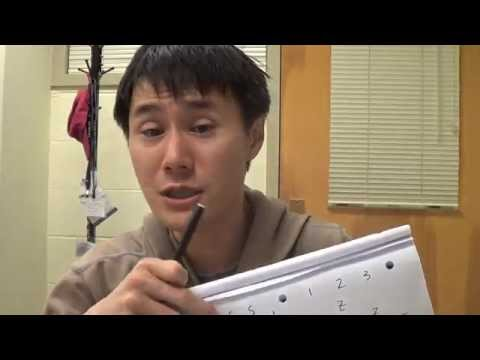

In [13]:
MoocVideo("nnzPiJ3Q3_8", src_location="8.1-summary")

Questions about what you just learned? Ask them below!

In [14]:
MoocDiscussion("Questions", "Periodic table")

MoocDiscussion(**{'display_name': 'Periodic table', 'discussion_category': 'Questions', 'discussion_id': 'a673e4cfbe6926ff2c727e2b890b04ba', 'discussion_target': 'Periodic table'})